In [25]:
import pandas as pd
df = pd.read_parquet("device_metadata_all_20251119_115359.parquet")
print(df.head())
print(df.info())
import pandas as pd
import os


# Basic info
num_rows, num_cols = df.shape
file_size_mb = os.path.getsize("device_metadata_all_20251119_115359.parquet")
print(f"Rows: {num_rows:,}")
print(f"Columns: {num_cols}")
print(f"File size: {file_size_mb:.2f} MB")
print("\nColumn names:")

print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nPreview of data:")
print(df.head())

# compare with CSV
csv_path = "device_metadata_all_20251119_115359.csv"
df.to_csv(csv_path, index=False)
csv_size_mb = os.path.getsize(csv_path) / (1024 * 1024)
print(f"\nCSV file size (for comparison): {csv_size_mb:.2f} MB")
df. head




       id             uuid timestamp just_booted  reset_reason  uptime  \
0  234227  359404230124795                  None           NaN   17395   
1  234223  359404230124795                  None           NaN   17285   
2  234218  359404230124795                  None           NaN   16728   
3  234208  359404230124795                  None           NaN   16347   
4  234206  359404230124795                  None           NaN   15931   

  fw_version modem_fw_version  rsrp  
0                              -128  
1                              -134  
2                              -133  
3                              -130  
4                              -137  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56522 entries, 0 to 56521
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                56522 non-null  int32  
 1   uuid              56522 non-null  object 
 2   timestamp         56522 no

<bound method NDFrame.head of            id             uuid timestamp just_booted  reset_reason  uptime  \
0      234227  359404230124795                  None           NaN   17395   
1      234223  359404230124795                  None           NaN   17285   
2      234218  359404230124795                  None           NaN   16728   
3      234208  359404230124795                  None           NaN   16347   
4      234206  359404230124795                  None           NaN   15931   
...       ...              ...       ...         ...           ...     ...   
56517  214098  359404230124464                  None           NaN   13847   
56518  213975  359404230124464                  None           NaN     245   
56519  213917  359404230124464                  None           NaN    2475   
56520  213916  359404230124464                  None           NaN    2352   
56521  213912  359404230124464                  None           NaN    2062   

      fw_version modem_fw_version

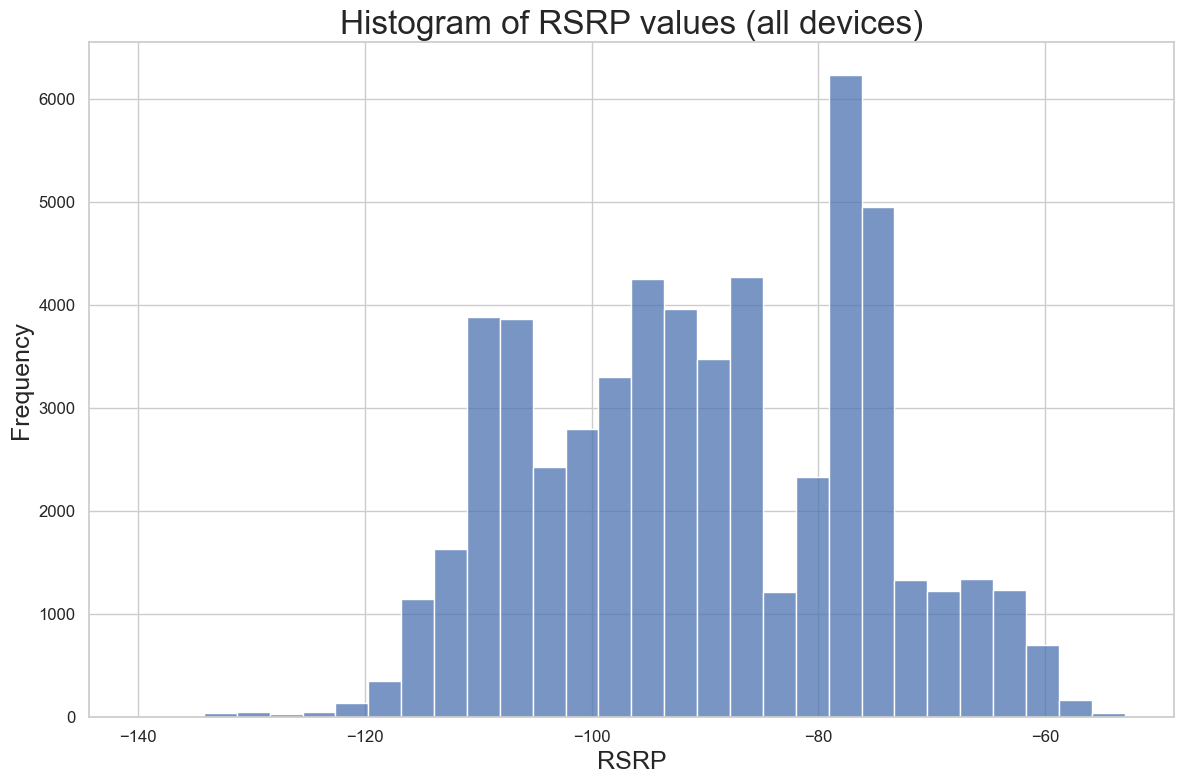

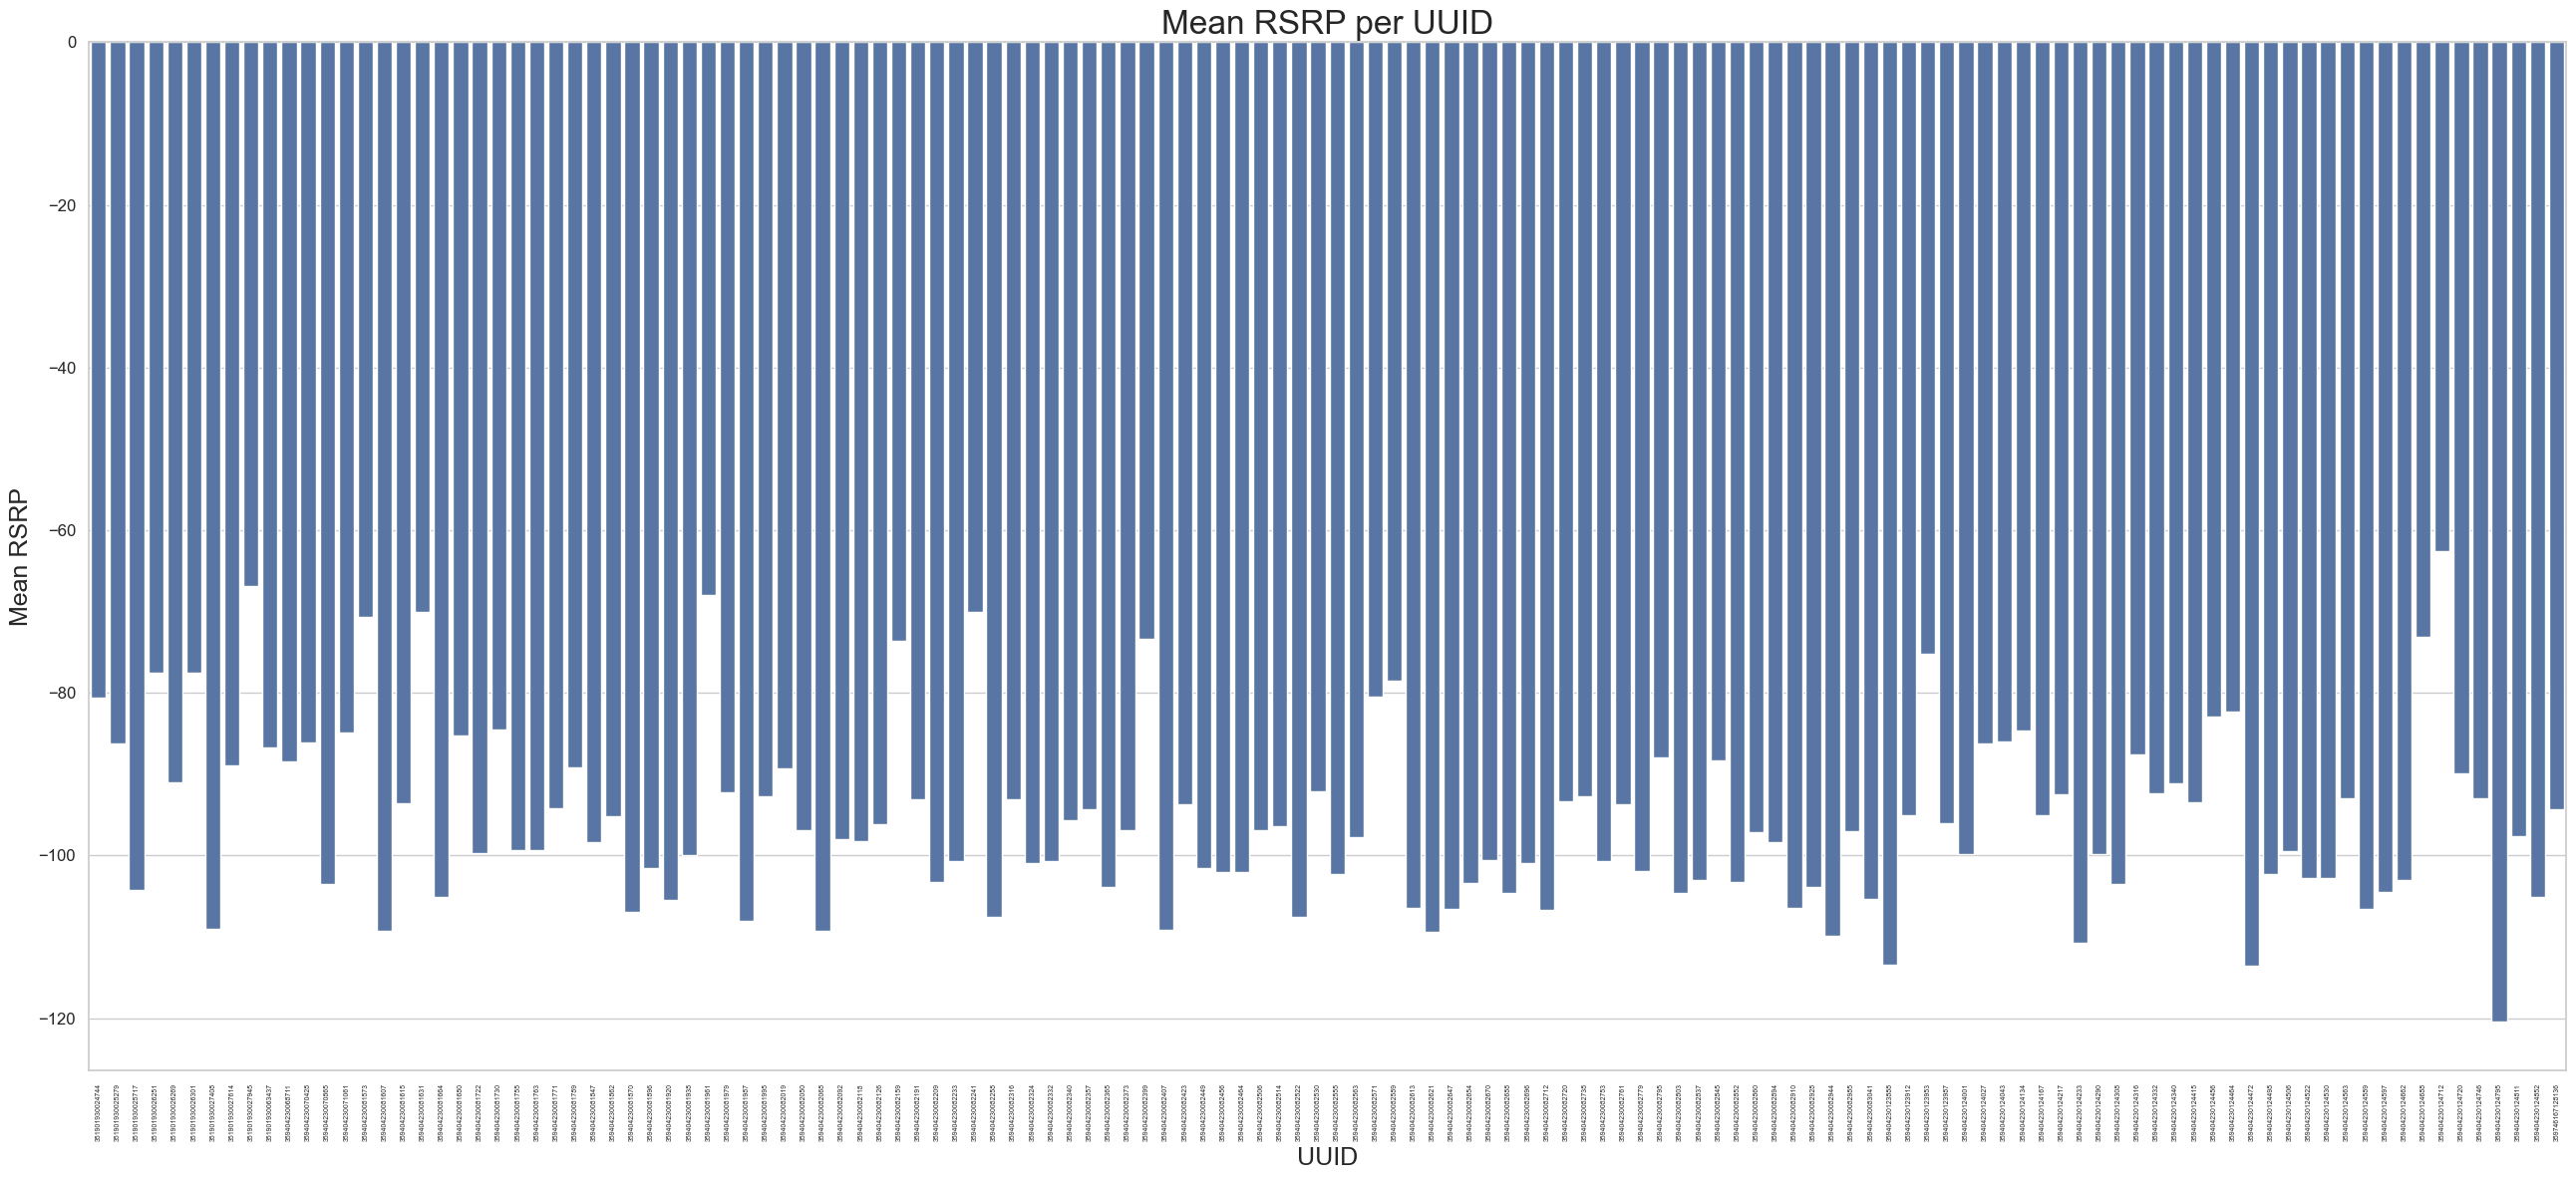

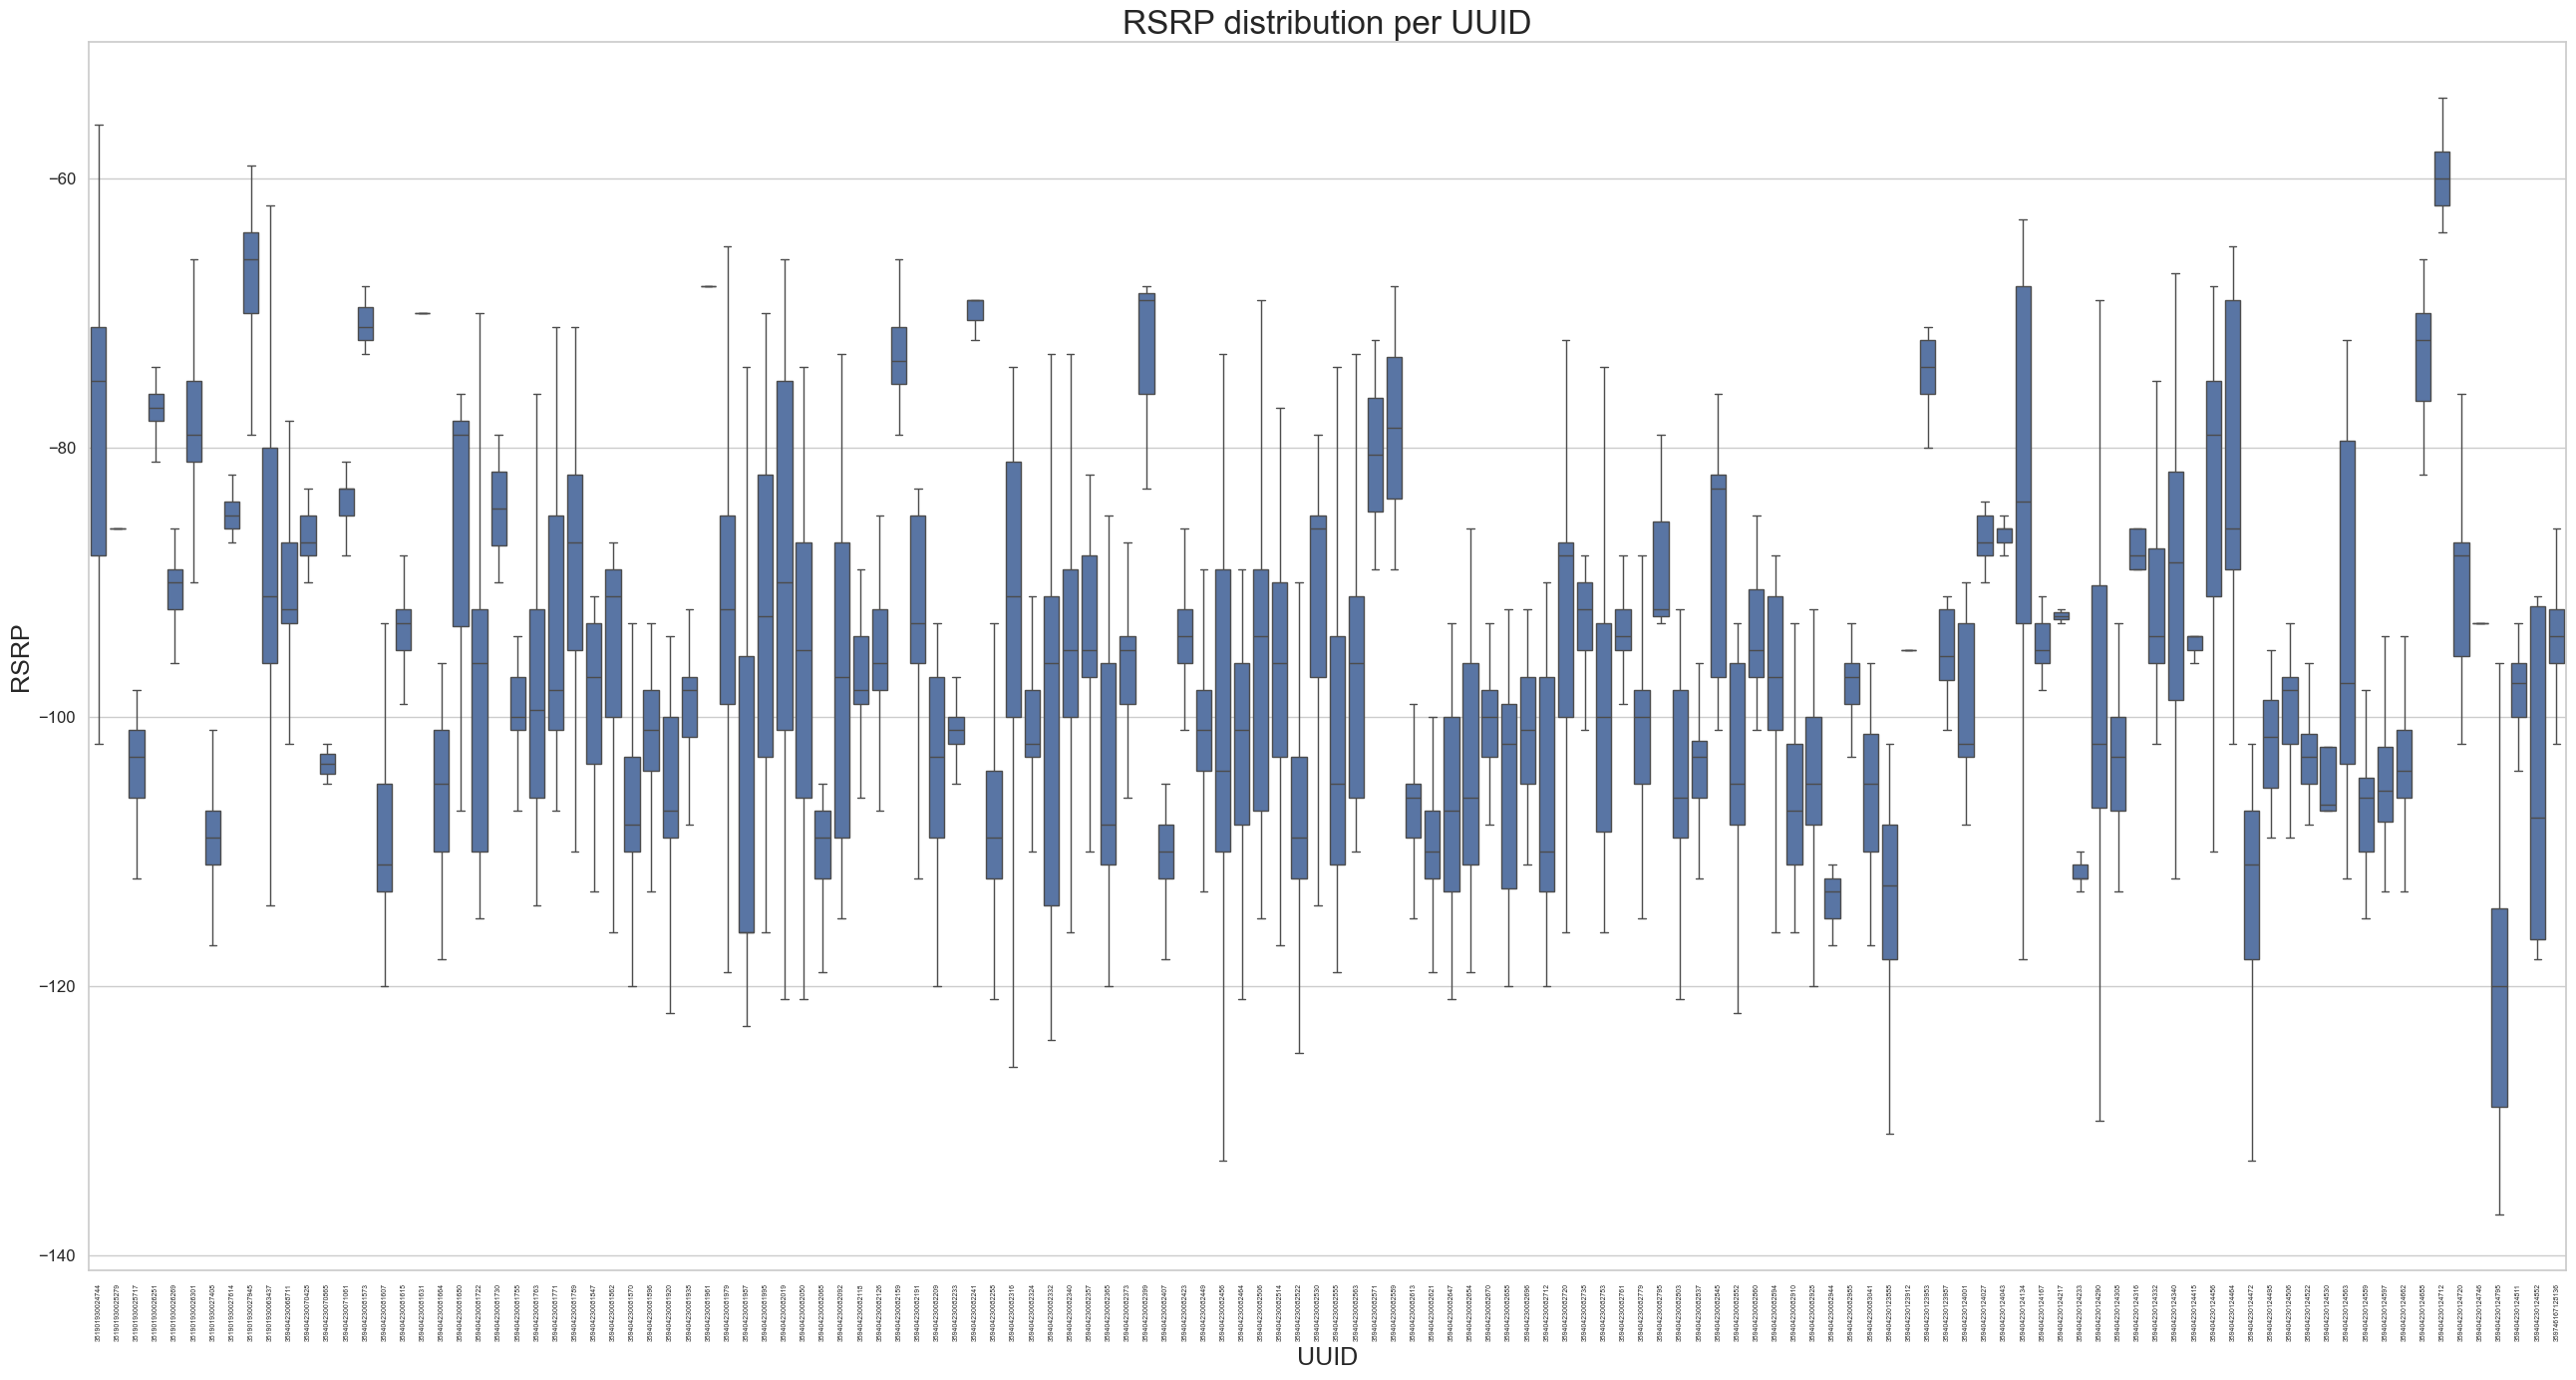

In [26]:
################# RSRP STATISTICS   ##########################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


path = "device_metadata_all_20251119_115359.csv"  
df = pd.read_csv(path)


df_rsrp = df[["uuid", "rsrp"]].dropna()

stats_per_uuid = (
    df_rsrp.groupby("uuid")["rsrp"]
    .agg(["count", "mean", "std", "min", "max"])
    .reset_index()
)

# Histogram of all RSRP

plt.figure(figsize=(12, 8))
sns.histplot(df_rsrp["rsrp"], bins=30)

plt.xlabel("RSRP", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title("Histogram of RSRP values (all devices)", fontsize=24)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

# Mean RSRP per UUID (barplot)

plt.figure(figsize=(26, 12))


sns.barplot(
    data=stats_per_uuid,
    x="uuid",
    y="mean",
    errorbar=None 
)

plt.xlabel("UUID", fontsize=18)
plt.ylabel("Mean RSRP", fontsize=18)
plt.title("Mean RSRP per UUID", fontsize=24)

plt.xticks(rotation=90, fontsize=5)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

# RSRP distribution per UUID (box)

plt.figure(figsize=(26, 14))


sns.boxplot(
    data=df_rsrp,
    x="uuid",
    y="rsrp",
    showfliers=False
)

plt.xlabel("UUID", fontsize=18)
plt.ylabel("RSRP", fontsize=18)
plt.title("RSRP distribution per UUID", fontsize=24)

plt.xticks(rotation=90, fontsize=5)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


Number of devices after min-sample filter: 108
Cluster centers (std, iqr) in original scale:
  Cluster 0: std=5.30, iqr=5.42
  Cluster 1: std=9.99, iqr=15.94

Counts per group:
stability_label
stable      65
unstable    43
Name: count, dtype: int64

Example of classified devices:
               uuid  count        mean        std    iqr stability_label
0   351901930024744    827  -80.567110  15.771946  17.00        unstable
1   351901930025279   2010  -86.257214   2.999753   0.00          stable
2   351901930025717     37 -104.189189   5.531917   5.00          stable
3   351901930026251   8977  -77.522223   2.846641   2.00          stable
4   351901930026269   3765  -90.973174   2.820351   3.00          stable
5   351901930026301   5634  -77.589457   6.060460   6.00          stable
6   351901930027408   5655 -109.058709   2.964491   4.00          stable
7   351901930027614    275  -88.934545  10.103628   2.00          stable
8   351901930027945   4678  -66.817016   5.260366   6.00      

c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


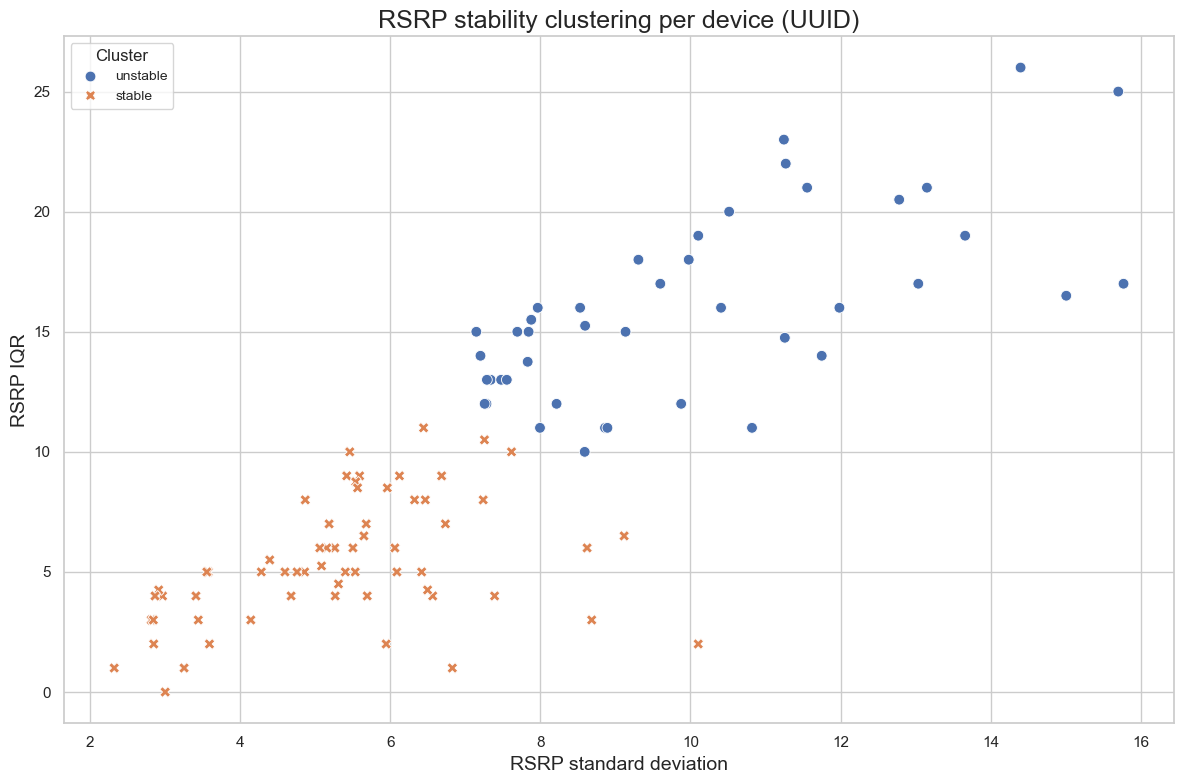

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


path = "device_metadata_all_20251119_115359.csv"  
df = pd.read_csv(path)


df_rsrp = df[["uuid", "rsrp"]].dropna()


def iqr(x):
    return np.percentile(x, 75) - np.percentile(x, 25)

stats = (
    df_rsrp.groupby("uuid")["rsrp"]
    .agg(
        count="count",
        mean="mean",
        std="std",
        min="min",
        max="max",
        iqr=iqr
    )
    .reset_index()
)

#  filter out devices with too few samples
MIN_SAMPLES = 20
stats = stats[stats["count"] >= MIN_SAMPLES].copy()

print("Number of devices after min-sample filter:", len(stats))

# Clustering into stable / unstable

# Features: standard deviation and IQR of RSRP
X = stats[["std", "iqr"]].values

# Scale features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
stats["cluster"] = kmeans.fit_predict(X_scaled)

# Decide which cluster is "stable" (lower variability)
cluster_centers = kmeans.cluster_centers_
# Transform centers back to original scale for interpretation 
centers_original = scaler.inverse_transform(cluster_centers)

print("Cluster centers (std, iqr) in original scale:")
for i, (c_std, c_iqr) in enumerate(centers_original):
    print(f"  Cluster {i}: std={c_std:.2f}, iqr={c_iqr:.2f}")

# Cluster with smaller avg std is "stable"
stable_cluster = np.argmin(centers_original[:, 0])

def label_cluster(c):
    return "stable" if c == stable_cluster else "unstable"

stats["stability_label"] = stats["cluster"].apply(label_cluster)


print("\nCounts per group:")
print(stats["stability_label"].value_counts())

print("\nExample of classified devices:")
print(stats[["uuid", "count", "mean", "std", "iqr", "stability_label"]].head(20))

# save
stats.to_csv("uuid_rsrp_stability_clusters.csv", index=False)

# scatter of std vs iqr with clusters

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=stats,
    x="std",
    y="iqr",
    hue="stability_label",
    style="stability_label",
    s=60
)

plt.xlabel("RSRP standard deviation", fontsize=14)
plt.ylabel("RSRP IQR", fontsize=14)
plt.title("RSRP stability clustering per device (UUID)", fontsize=18)
plt.legend(title="Cluster", fontsize=10)
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import numpy as np

path = "device_metadata_all_20251119_115359.csv"  
df = pd.read_csv(path)

df_rsrp = df[["uuid", "rsrp"]].dropna()

# IQR calculation
def iqr(x):
    return np.percentile(x, 75) - np.percentile(x, 25)

# Build statistics table
stats = (
    df_rsrp.groupby("uuid")["rsrp"]
    .agg(
        count="count",
        mean="mean",
        std="std",
        min="min",
        max="max",
        median="median",
        iqr=iqr
    )
    .reset_index()
)

# Sort by best mean RSRP (highest value)
stats_sorted = stats.sort_values(by="mean", ascending=False)

# Show table
print(stats_sorted)


stats_sorted.to_csv("rsrp_statistics_sorted_best_devices.csv", index=False)
print("Saved to rsrp_statistics_sorted_best_devices.csv")


                uuid  count        mean        std  min  max  median    iqr
123  359404230124712     29  -62.586207   7.389748  -83  -54   -60.0   4.00
8    351901930027945   4678  -66.817016   5.260366 -113  -59   -66.0   6.00
32   359404230081961      1  -68.000000        NaN  -68  -68   -68.0   0.00
17   359404230081631      1  -70.000000        NaN  -70  -70   -70.0   0.00
46   359404230082241      3  -70.000000   1.732051  -72  -69   -69.0   1.50
..               ...    ...         ...        ...  ...  ...     ...    ...
91   359404230082944     91 -109.890110   8.683894 -117  -73  -113.0   3.00
104  359404230124233     88 -110.704545   6.826519 -132  -68  -112.0   1.00
94   359404230123888    146 -113.465753   7.615016 -131  -70  -112.5  10.00
113  359404230124472     59 -113.525424  10.820408 -136  -72  -111.0  11.00
126  359404230124795     50 -120.420000  11.257814 -137  -74  -120.0  14.75

[130 rows x 8 columns]
Saved to rsrp_statistics_sorted_best_devices.csv


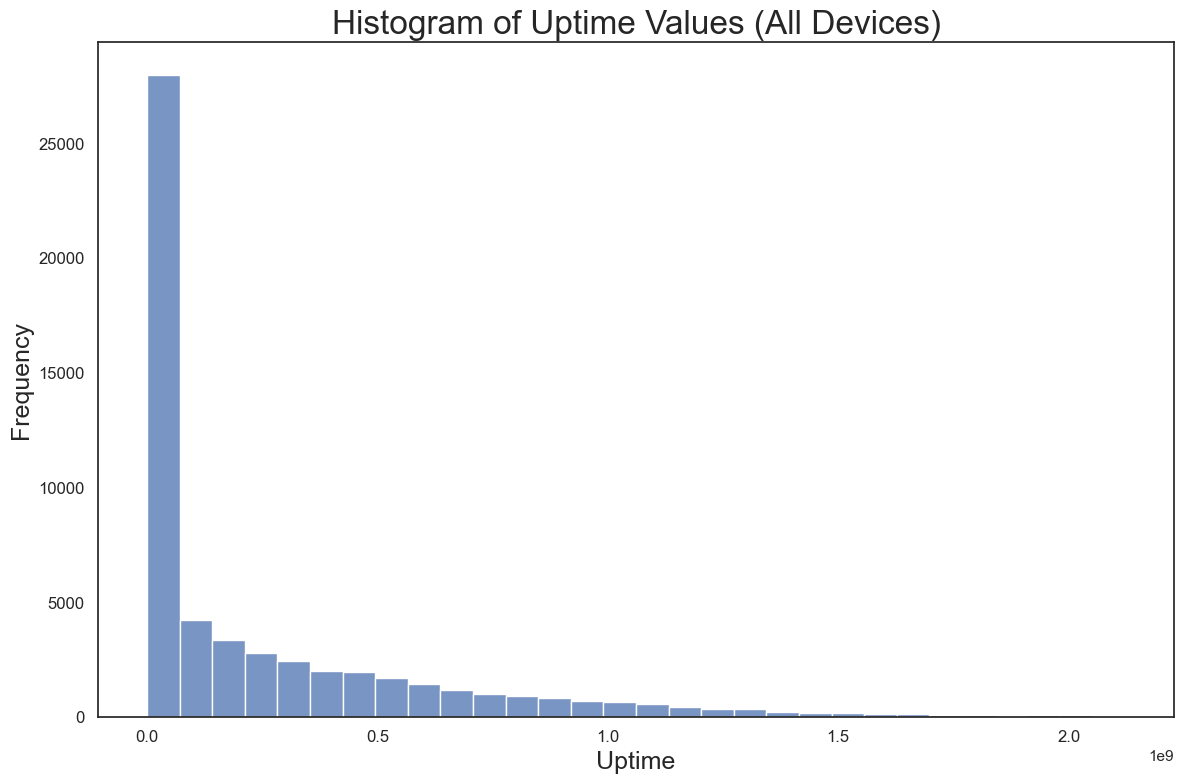

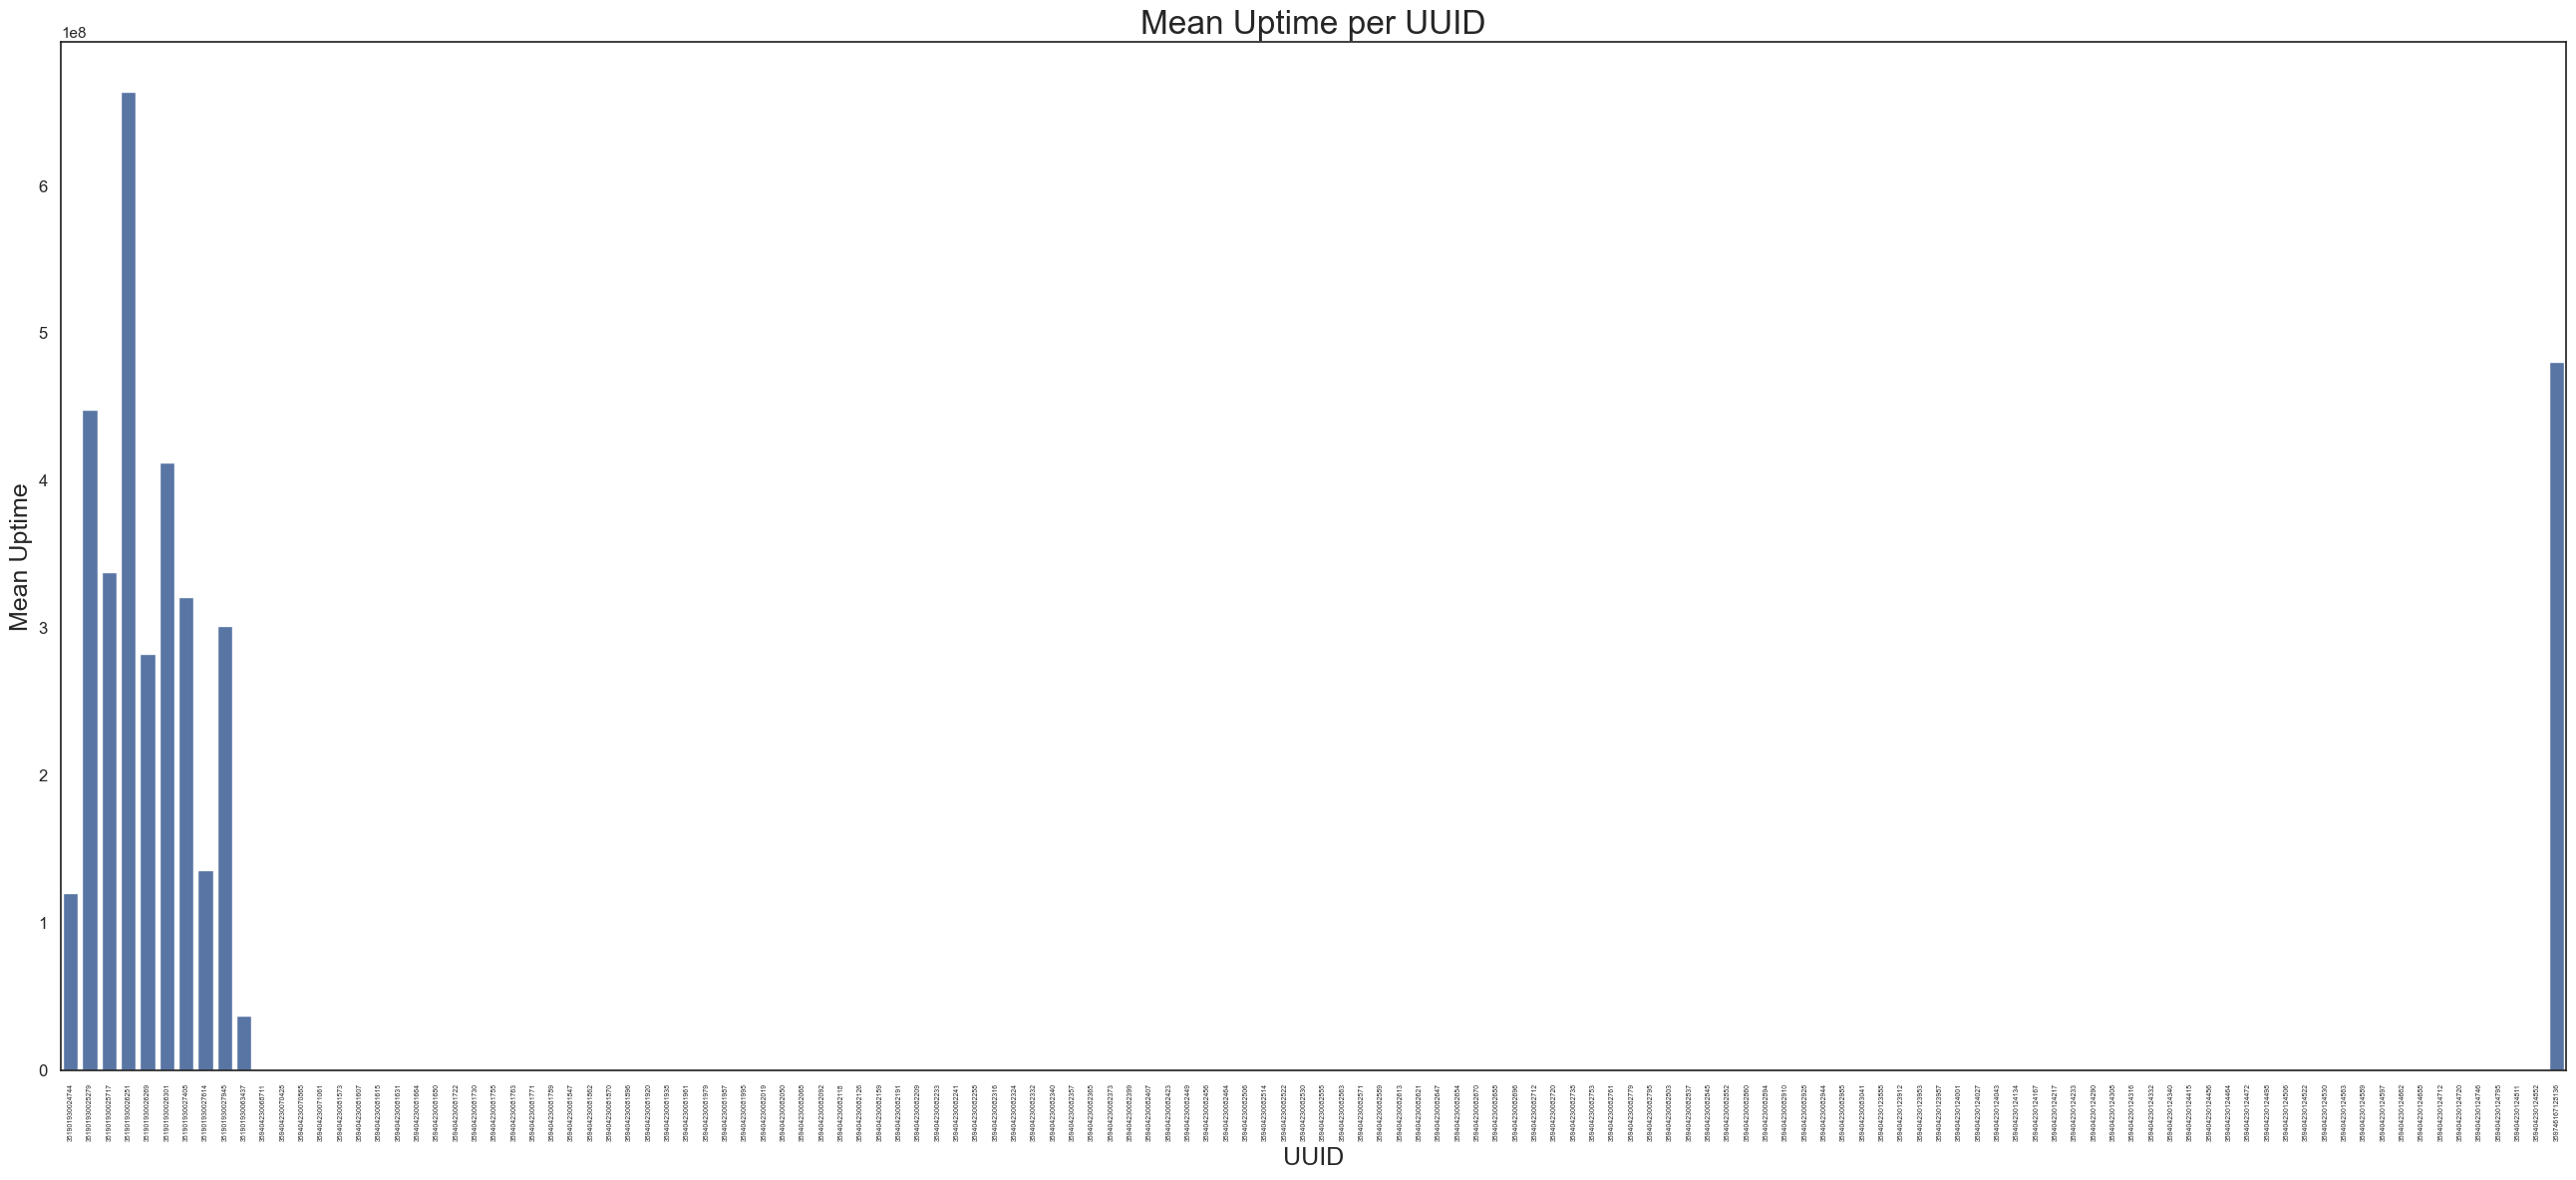

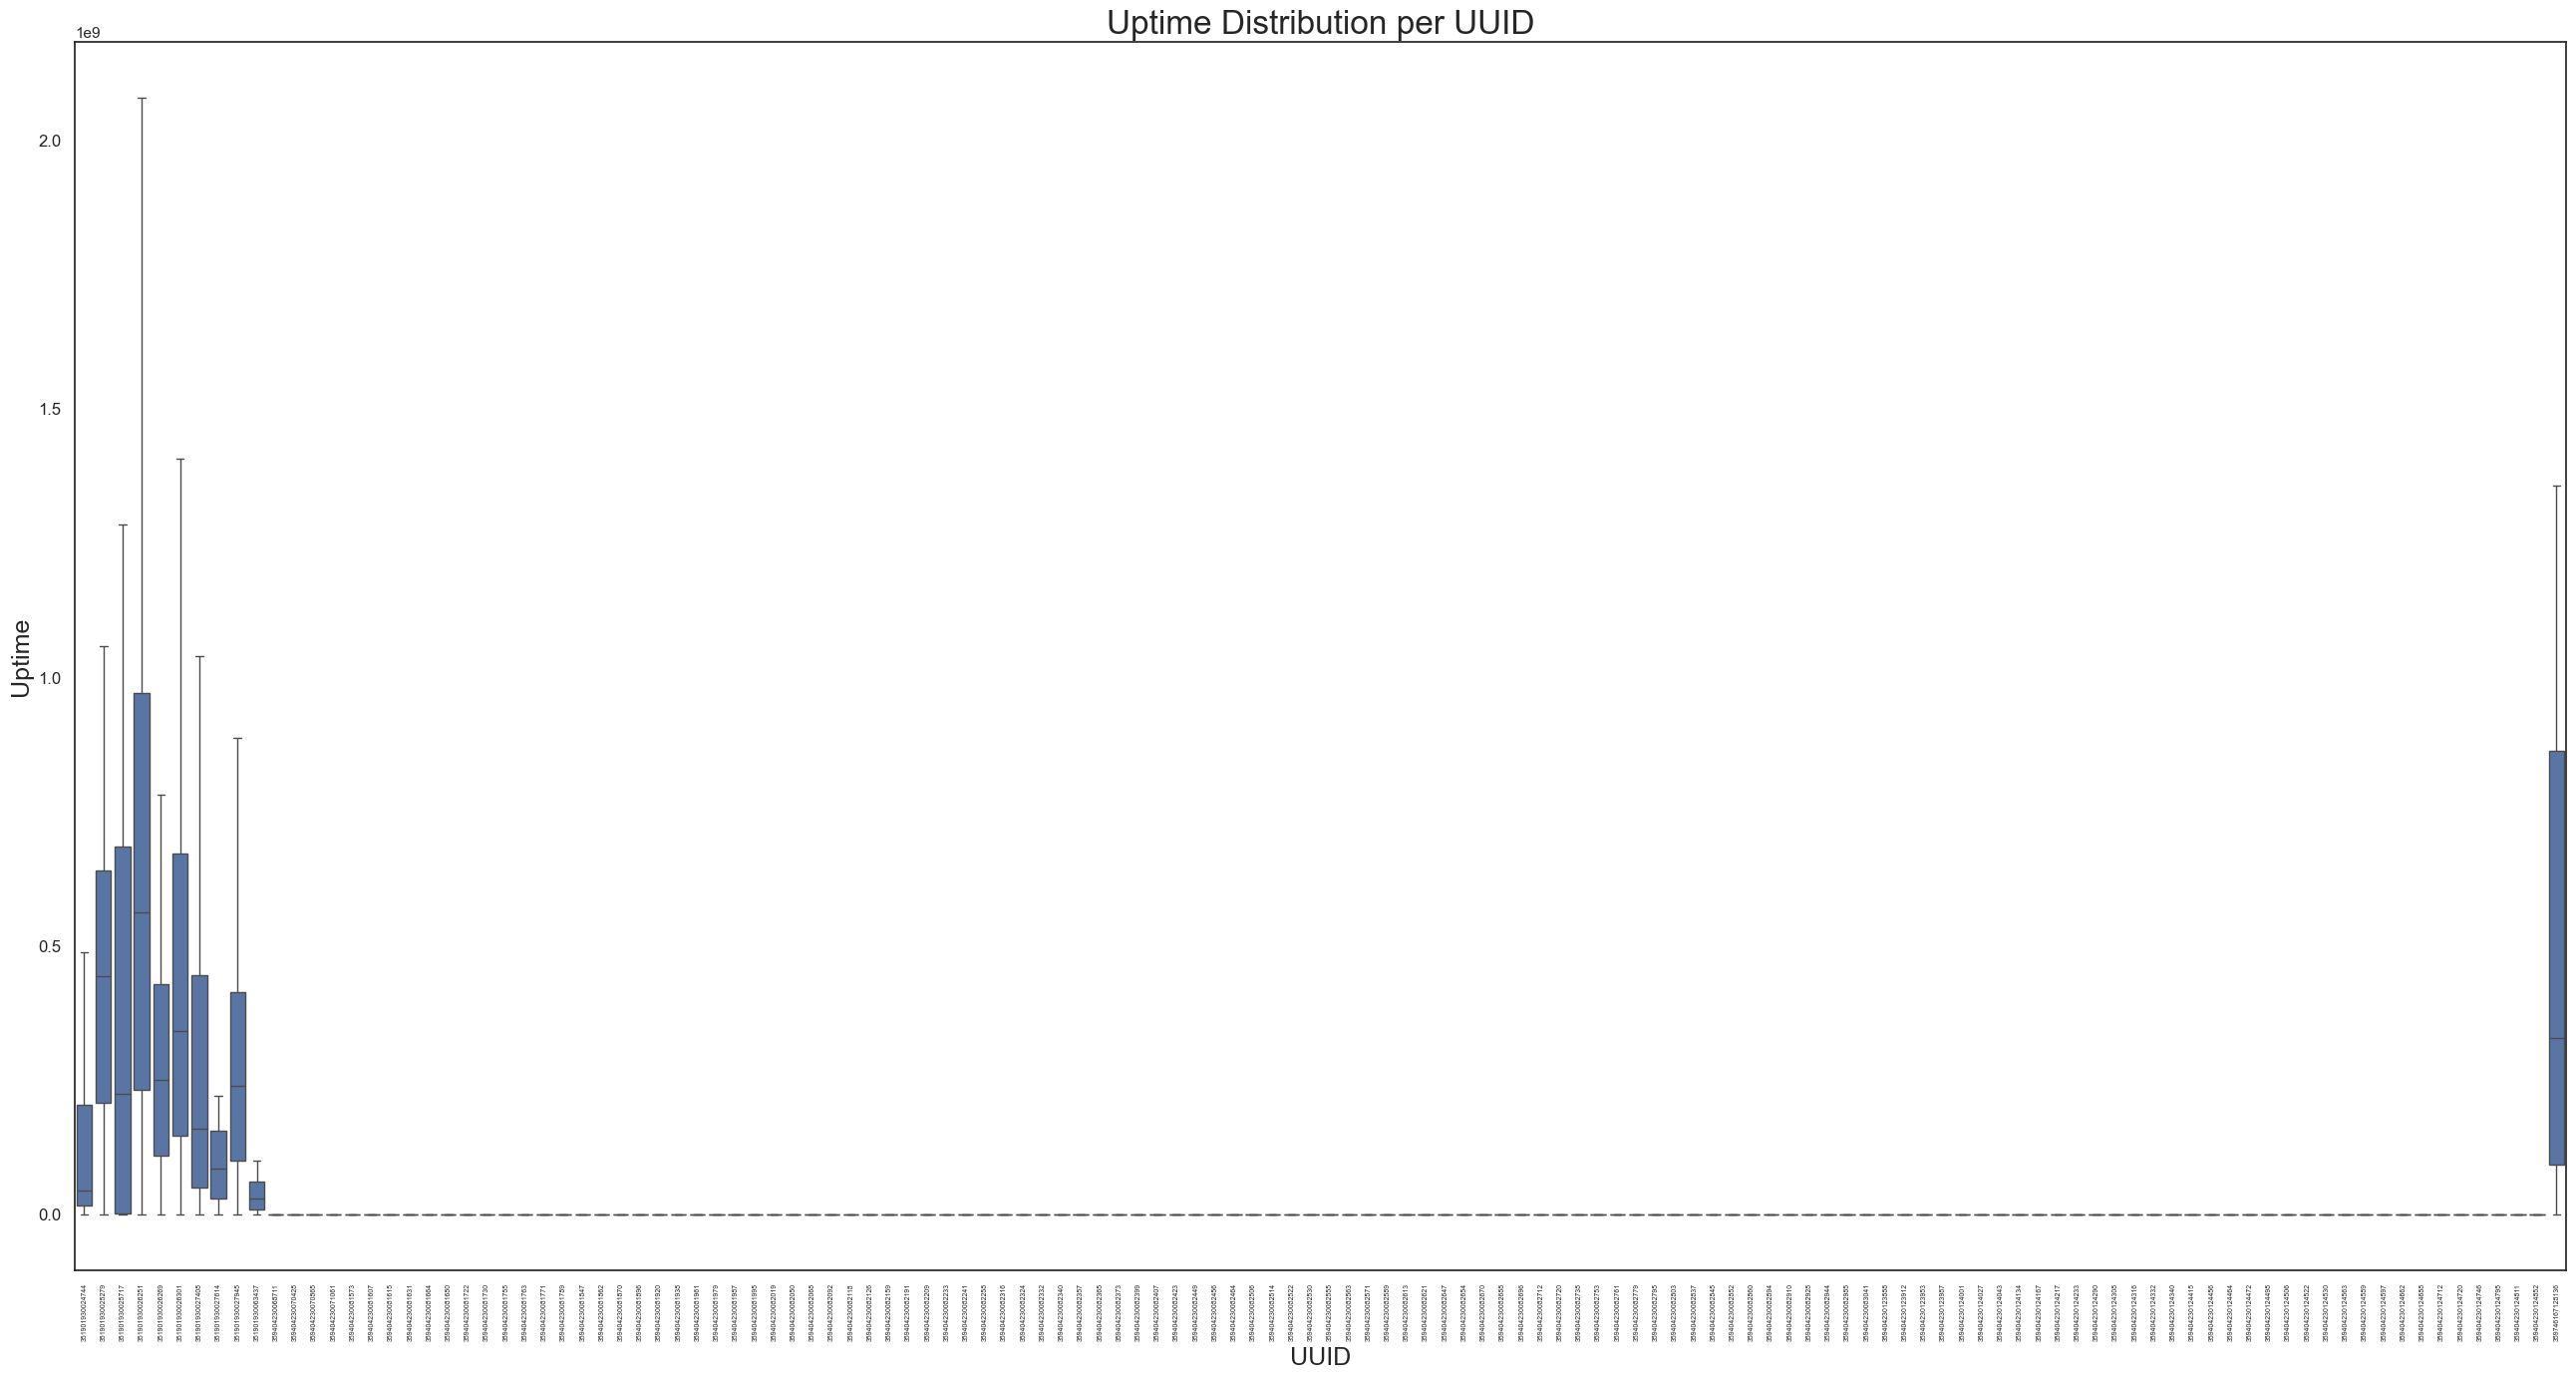

In [29]:
###############################  UPTIME STATISTICS #####################################

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


path = "device_metadata_all_20251119_115359.csv"
df = pd.read_csv(path)

# Keep needed columns
df_uptime = df[["uuid", "uptime"]].dropna()

# IQR function
def iqr(x):
    return np.percentile(x, 75) - np.percentile(x, 25)

# Statistics per UUID
uptime_stats = (
    df_uptime.groupby("uuid")["uptime"]
    .agg(
        count="count",
        mean="mean",
        std="std",
        min="min",
        max="max",
        median="median",
        iqr=iqr,
    )
    .reset_index()
)




uptime_stats.to_csv("uptime_statistics_per_uuid.csv", index=False)

# Disable grids !!

sns.set_style("white")  # Removes grid
plt.rcParams["axes.grid"] = False


# Histogram of all uptime values

plt.figure(figsize=(12, 8))
sns.histplot(df_uptime["uptime"], bins=30)

plt.xlabel("Uptime", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title("Histogram of Uptime Values (All Devices)", fontsize=24)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



# Bar plot of mean uptime per UUID

plt.figure(figsize=(26, 12))
sns.barplot(
    data=uptime_stats,
    x="uuid",
    y="mean",
    errorbar=None  
)

plt.xlabel("UUID", fontsize=18)
plt.ylabel("Mean Uptime", fontsize=18)
plt.title("Mean Uptime per UUID", fontsize=24)
plt.xticks(rotation=90, fontsize=5)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Boxplot of uptime distribution per UUID

plt.figure(figsize=(26, 14))
sns.boxplot(
    data=df_uptime,
    x="uuid",
    y="uptime",
    showfliers=False
)

plt.xlabel("UUID", fontsize=18)
plt.ylabel("Uptime", fontsize=18)
plt.title("Uptime Distribution per UUID", fontsize=24)
plt.xticks(rotation=90, fontsize=5)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
